In [1]:
!pip install langgraph langsmith

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 11.3 MB/s eta 0:00:00


In [2]:
!pip install langchain langchain_groq langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.9/134.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


In [ ]:
groq_api_key="your_api_key_here"
langsmith="your_api_key_here"

In [4]:
from langchain_groq import ChatGroq

In [5]:
llm=ChatGroq(groq_api_key=groq_api_key, model_name="Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7db6bdae5f40>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7db6bda5ce30>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [6]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [7]:
class State(TypedDict):
  # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
  messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)

In [8]:
graph_builder

In [9]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}

In [10]:
graph_builder.add_node("chatbot",chatbot)

In [11]:
graph_builder

In [12]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [13]:
graph=graph_builder.compile()

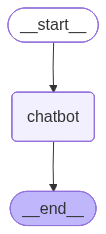

In [14]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [ ]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:",value["messages"].content)

User: Omni-Man
dict_values([{'messages': AIMessage(content="Omni-Man, also known as Nolan Grayson, is a fictional superhero appearing in the Image Comics series *Invincible* created by Robert Kirkman, Cory Walker, and Ryan Ottley. \n\nHere's a breakdown of his character:\n\n**Origin:**\n\n* **Viltrumite:** Omni-Man is a member of the Viltrumite race, a powerful alien species known for their superhuman strength, speed, durability, and flight.\n\n* **Mission:** He was sent to Earth on a mission to conquer it for Viltrumite rule.\n\n**Personality:**\n\n* **Charismatic and Deceptive:** Initially, Omni-Man presents himself as a heroic protector, quickly becoming a beloved figure and a symbol of hope. However, this is a carefully crafted facade to gain the trust of humanity before revealing his true intentions.\n* **Ruthless and Cold:**  Beneath the charming exterior lies a ruthless and calculating alien warrior driven by his loyalty to his race and his belief in Viltrumite superiority. He i